In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re

In [2]:
# Import Datataset
df = pd.read_csv('full-all-2-with-headers.csv', encoding='utf-16')
df.head()

,link,name,current_title,current_location,experiences,educations,skills
0,https://www.linkedin.com/in/pooya-movahed-b897...,Pooya Movahed,Data Scientist at ExxonMobil,"Houston, Texas, United States","[{'titles': ['ExxonMobil', 'Data Scientist', '...","[['Doctor of Philosophy (Ph.D.), Mechanical En...","['Hydrodynamic instabilities', 'Machine Learni..."
1,https://www.linkedin.com/in/emmayaoxie,"Yao Xie, CFA",Data Scientist at PayPal,San Francisco Bay Area,"[{'titles': ['Data Scientist 2'], 'exp': ['Pay...","[['Master of Science - MS, Computer Science', ...","['Financial Modeling', 'Quantitative Analytics..."
2,https://www.linkedin.com/in/xiaozhou-shen,Xiaozhou Shen,Data Scientist at Bayer Crop Science,"Portland, Oregon Metropolitan Area","[{'titles': ['Data Scientist'], 'exp': ['Bayer...","[['Master of Science - MS, Computer Science', ...","['Fortran', 'C (Programming Language)', 'C++',..."
3,https://www.linkedin.com/in/yacine-brini,Yacine Brini,Data Scientist at Patreon,"San Francisco, California, United States","[{'titles': ['Senior Data Scientist'], 'exp': ...","[['Master of Engineering (M.Eng.), Industrial ...","['MySQL', 'Python', 'French', 'English', 'Entr..."
4,https://www.linkedin.com/in/eddy-yeo-wai-kit,"Wai Kit, (Eddy) Y.",Senior Data Scientist | Software Engineer | Su...,"Singapore, Singapore","[{'titles': ['Micron Technology', 'Senior Data...","[['Bachelor of Science (B.Sc.), Computer Scien...","['C#', 'Ruby on Rails', 'C++', 'Amazon Web Ser..."


In [3]:
for col in df.columns:
    print(col)

link
name
current_title
current_location
experiences
educations
skills


In [4]:
df['experiences']

0      [{'titles': ['ExxonMobil', 'Data Scientist', '...
1      [{'titles': ['Data Scientist 2'], 'exp': ['Pay...
2      [{'titles': ['Data Scientist'], 'exp': ['Bayer...
3      [{'titles': ['Senior Data Scientist'], 'exp': ...
4      [{'titles': ['Micron Technology', 'Senior Data...
                             ...                        
345    [{'titles': ['Principal Data Scientist'], 'exp...
346    [{'titles': ['Assistant Officer'], 'exp': ['DO...
347    [{'titles': ['Data Scientist'], 'exp': ['Intel...
348    [{'titles': ['Lead Data Scientist'], 'exp': ['...
349    [{'titles': ['Lead Data Scientist, RGM'], 'exp...
Name: experiences, Length: 350, dtype: object

In [5]:
df['educations']

0      [['Doctor of Philosophy (Ph.D.), Mechanical En...
1      [['Master of Science - MS, Computer Science', ...
2      [['Master of Science - MS, Computer Science', ...
3      [['Master of Engineering (M.Eng.), Industrial ...
4      [['Bachelor of Science (B.Sc.), Computer Scien...
                             ...                        
345    [['Doctor of Philosophy - PhD, Physics', '2002...
346    [['Master of Data Science, Data Science', '201...
347    [['Doctor of Philosophy - PhD, Artificial Inte...
348    [["Bachelor's in Information Science and Techn...
349    [['Ph.D, Distributed System', '2004 - 2008'], ...
Name: educations, Length: 350, dtype: object

In [6]:
df['skills']

0      ['Hydrodynamic instabilities', 'Machine Learni...
1      ['Financial Modeling', 'Quantitative Analytics...
2      ['Fortran', 'C (Programming Language)', 'C++',...
3      ['MySQL', 'Python', 'French', 'English', 'Entr...
4      ['C#', 'Ruby on Rails', 'C++', 'Amazon Web Ser...
                             ...                        
345    ['Nanotechnology', 'Physics', 'Surface Chemist...
346    ['Teamwork', 'Data Science', 'Data Analysis', ...
347    ['Machine Learning', 'R (Programming Language)...
348    ['Machine Learning', 'C#', 'Artificial Intelli...
349    ['Machine Learning', 'C++', 'Web Applications'...
Name: skills, Length: 350, dtype: object

In [7]:
df.shape
df.describe()

,link,name,current_title,current_location,experiences,educations,skills
count,350,350,350,349,350,350,350
unique,350,350,275,98,349,344,343
top,https://www.linkedin.com/in/pooya-movahed-b897...,Pooya Movahed,Data Scientist,"Kuala Lumpur, Federal Territory of Kuala Lumpu...","[{'titles': ['Standard Chartered Bank', 'Vice ...","[['Master of Business Administration (M.B.A.),...",[]
freq,1,1,42,86,2,2,6


In [8]:
samplesize = len(df.index)
#samplesize
print('Total Data Scientist SampleSize: ' + str(samplesize))
#print(df[df.columns[0]].count())

Total Data Scientist SampleSize: 350


# DataScientist by Area_Pie

ds_count = (df['current_location']).value_counts()
ds_count.head()

In [14]:
#clean 'current_location', take only city
df[['city','state','country']] = df.current_location.str.split(',',expand=True)
loc_split_df = df[['city','state','country']]
loc_split_df

,city,state,country
0,Houston,Texas,United States
1,San Francisco Bay Area,None,None
2,Portland,Oregon Metropolitan Area,None
3,San Francisco,California,United States
4,Singapore,Singapore,None
...,...,...,...
345,Penang,Malaysia,None
346,George Town,Penang,Malaysia
347,Penang,Malaysia,None
348,Kuala Lumpur,Federal Territory of Kuala Lumpur,Malaysia


In [15]:
#standardize kuala lumpur
loc_split_df['city'] = loc_split_df['city'].replace(['Federal Territory of Kuala Lumpur'],'Kuala Lumpur')
loc_split_df['city'] = loc_split_df['city'].replace(['Greater Kuala Lumpur'],'Kuala Lumpur')
loc_split_df

C:\Users\LowJoonK\AppData\Local\Temp\ipykernel_19532\423469687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_split_df['city'] = loc_split_df['city'].replace(['Federal Territory of Kuala Lumpur'],'Kuala Lumpur')
C:\Users\LowJoonK\AppData\Local\Temp\ipykernel_19532\423469687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_split_df['city'] = loc_split_df['city'].replace(['Greater Kuala Lumpur'],'Kuala Lumpur')


,city,state,country
0,Houston,Texas,United States
1,San Francisco Bay Area,None,None
2,Portland,Oregon Metropolitan Area,None
3,San Francisco,California,United States
4,Singapore,Singapore,None
...,...,...,...
345,Penang,Malaysia,None
346,George Town,Penang,Malaysia
347,Penang,Malaysia,None
348,Kuala Lumpur,Federal Territory of Kuala Lumpur,Malaysia


In [16]:
ds_count_city_df = loc_split_df.groupby(['city']).agg(ds_count_city=('city','count')).reset_index()

#loc_count = loc_split_df['city'].value_counts()
ds_count_city_df.head()

,city,ds_count_city
0,Ampang,1
1,Ankara,1
2,Australia,1
3,Ayer Hitam,1
4,Bandar Baru Bangi,2


In [17]:
print(len(ds_count_city_df))

94


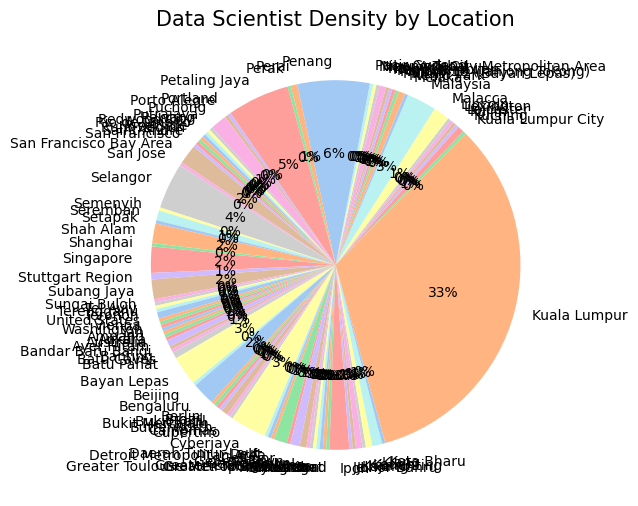

In [18]:
#how to sort by largest to lowest?
#Data cleaning on location required? --> now only treat for Kuala Lumpur
#Show only top50?

#define data
#plt.figure(figsize=(6,6))
dscount = ds_count_city_df['ds_count_city']
labels = ds_count_city_df['city']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:10]

#create pie chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Data Scientist Density by Location', fontsize=15)

plt.pie(dscount, labels = labels, colors = colors, autopct='%.0f%%', startangle=200)
plt.show()

# DataScientist by Job_Title_Pie

In [99]:
#cancel this part as all data filtered is Data Scientist by default

# Prepare Skills for Viz - DataScientist Skills Pareto

In [19]:
#clean 'skills' list special character
df['skills'] = df['skills'].apply(eval)

In [20]:
df['skills']

0      [Hydrodynamic instabilities, Machine Learning,...
1      [Financial Modeling, Quantitative Analytics, V...
2      [Fortran, C (Programming Language), C++, Plasm...
3      [MySQL, Python, French, English, Entrepreneuri...
4      [C#, Ruby on Rails, C++, Amazon Web Services (...
                             ...                        
345    [Nanotechnology, Physics, Surface Chemistry, M...
346    [Teamwork, Data Science, Data Analysis, Micros...
347    [Machine Learning, R (Programming Language), P...
348    [Machine Learning, C#, Artificial Intelligence...
349    [Machine Learning, C++, Web Applications, Java...
Name: skills, Length: 350, dtype: object

In [21]:
#check 'skills' type
for i, l in enumerate(df['skills']):
 print('list',i,'is',type(l))

list 0 is <class 'list'>
list 1 is <class 'list'>
list 2 is <class 'list'>
list 3 is <class 'list'>
list 4 is <class 'list'>
list 5 is <class 'list'>
list 6 is <class 'list'>
list 7 is <class 'list'>
list 8 is <class 'list'>
list 9 is <class 'list'>
list 10 is <class 'list'>
list 11 is <class 'list'>
list 12 is <class 'list'>
list 13 is <class 'list'>
list 14 is <class 'list'>
list 15 is <class 'list'>
list 16 is <class 'list'>
list 17 is <class 'list'>
list 18 is <class 'list'>
list 19 is <class 'list'>
list 20 is <class 'list'>
list 21 is <class 'list'>
list 22 is <class 'list'>
list 23 is <class 'list'>
list 24 is <class 'list'>
list 25 is <class 'list'>
list 26 is <class 'list'>
list 27 is <class 'list'>
list 28 is <class 'list'>
list 29 is <class 'list'>
list 30 is <class 'list'>
list 31 is <class 'list'>
list 32 is <class 'list'>
list 33 is <class 'list'>
list 34 is <class 'list'>
list 35 is <class 'list'>
list 36 is <class 'list'>
list 37 is <class 'list'>
list 38 is <class 'lis

In [22]:
def skills_to_1D(series):
 return pd.Series([x for _list in series for x in _list])

print(skills_to_1D(df['skills']))

0       Hydrodynamic instabilities
1                 Machine Learning
2               Numerical Analysis
3                          Fortran
4                              C++
                   ...            
5825              Visual Analytics
5826                      Cloudera
5827                           SEO
5828                 Deep Learning
5829                             R
Length: 5830, dtype: object


In [23]:
#frequency count for each skill
skills_to_1D(df['skills']).value_counts()

Machine Learning                 180
Data Analysis                    167
Python (Programming Language)    166
SQL                              148
Microsoft Excel                  139
                                ... 
Unity                              1
Game Development                   1
Gameplay Programming               1
Tools Programming                  1
Visual Analytics                   1
Length: 1352, dtype: int64

Text(0.5, 1.0, 'Top30 Data Scientist Skills')

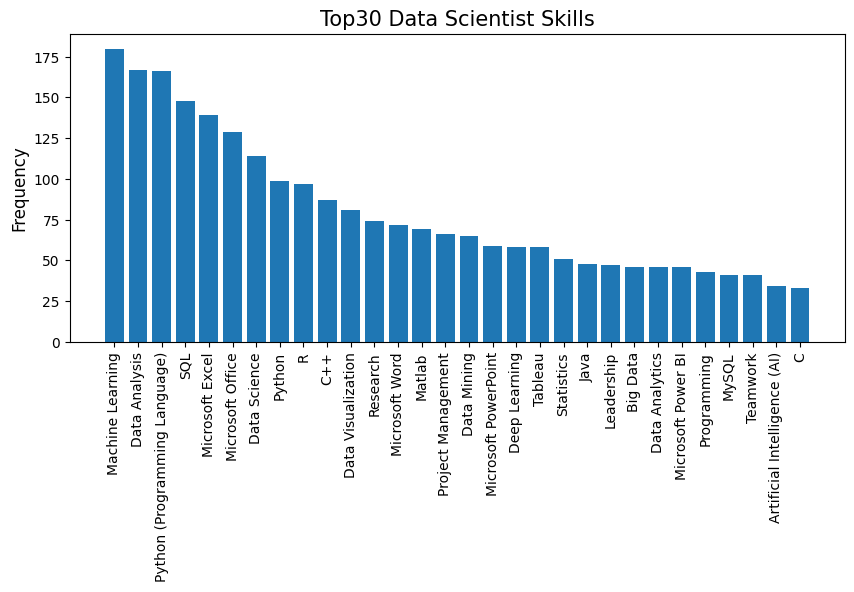

In [24]:
#top 30# Skills
skills_top_30 = skills_to_1D(df['skills']).value_counts()[:30]

fig, ax = plt.subplots(figsize = (10,4))
ax.bar(skills_top_30.index,
        skills_top_30.values)
ax.set_ylabel('Frequency', size = 12)
plt.xticks(rotation = 90)
ax.set_title('Top30 Data Scientist Skills', size = 15)

skills_expanded_clm = df['skills'].apply(pd.Series)
skills_expanded_clm.head() #NaN replaced with 0?

skills_expanded_clm.iloc[:,0].value_counts(normalize = True)

In [25]:
#https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173
#think for skills which library and chart type to use?

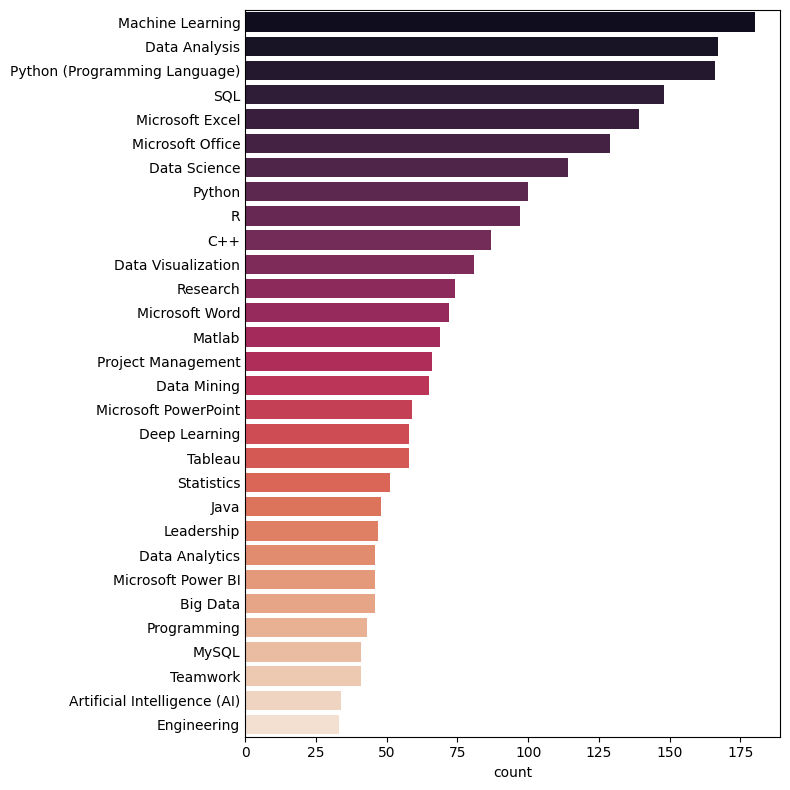

In [26]:
plt.figure(figsize=(8,8))
skills = skills_to_1D(df['skills']).str.split(',', expand=True).stack().reset_index(drop=True)

ax = sns.countplot(y=skills, order=skills.value_counts().iloc[:30].index, palette='rocket') #Change iloc as per top-n
ax.tick_params(axis='y', length=0)
plt.tight_layout()
plt.show()

In [27]:
# Not success to draw Pareto for Skills (Bar cart ok, but not yet assign %)

In [28]:
#create df for skill
skills_df = pd.DataFrame(skills_to_1D(df['skills']))
skills_df.columns = ['skill']
skills_df.head()

,skill
0,Hydrodynamic instabilities
1,Machine Learning
2,Numerical Analysis
3,Fortran
4,C++


In [29]:
#count skill by skills
skills_df_df = skills_df.groupby(['skill']).agg(skill_count=('skill','count')).reset_index()
skills_df_df.head()
#skills_df_df.to_csv('check_skill#.csv')

,skill,skill_count
0,Offshore Drilling,1
1,.NET,1
2,.NET Framework,6
3,3D Computer Aided Design (3D CAD),1
4,3D Modeling,2


In [30]:
#sort descending
skills_df= skills_df_df.sort_values(by='skill_count', ascending=False)
skills_df.head()

,skill,skill_count
667,Machine Learning,180
298,Data Analysis,167
943,Python (Programming Language),166
1049,SQL,148
722,Microsoft Excel,139


In [31]:
#prepare cumulative sum for Pareto
skills_df['cum_skillperc'] = round(skills_df['skill_count'].cumsum()/skills_df['skill_count'].sum()*100,3)
skills_df.head()

,skill,skill_count,cum_skillperc
667,Machine Learning,180,3.087
298,Data Analysis,167,5.952
943,Python (Programming Language),166,8.799
1049,SQL,148,11.338
722,Microsoft Excel,139,13.722


C:\Users\LowJoonK\AppData\Local\Temp\ipykernel_19532\2072854414.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 90)


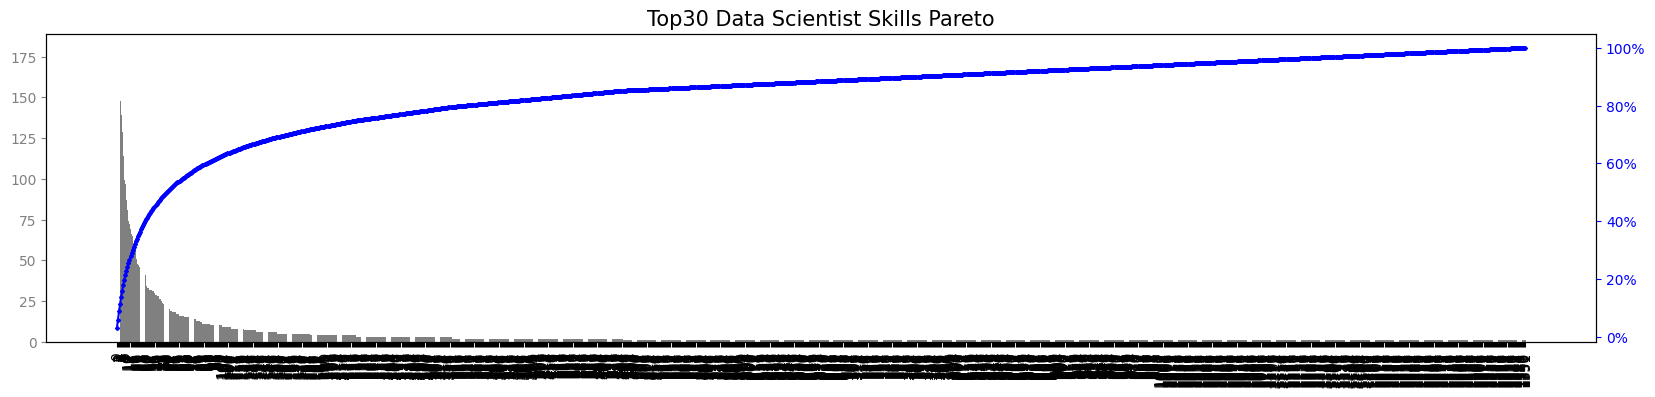

In [32]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

#define aesthetics for plot
color1 = 'grey'
color2 = 'blue'
line_size = 2

#create basic bar plot
fig, ax = plt.subplots(figsize=(20,4))
ax.bar(skills_df.skill, skills_df['skill_count'], color=color1)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(skills_df.skill, skills_df['cum_skillperc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
ax.set_title('Top30 Data Scientist Skills Pareto', size = 15)
#plt.xticks(rotation = 90)
ax.set_xticklabels(ax.get_xticks(), rotation = 90)
plt.show()

# DataScientist by Education

# DataScientist Working Years Working Years Experience Distribution